### 1.函数载入

In [1]:
import sys 
print(sys.version)

3.11.10 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:26) [MSC v.1929 64 bit (AMD64)]


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import pickle
import numpy as np
import pickle
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC as sv
#from sklearn.svm import LinearSVC as sv
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from yellowbrick.classifier import (
    ConfusionMatrix,
)
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import (
    ClassificationReport,
)
from yellowbrick.classifier import ROCAUC

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pickle import dump
from pickle import load

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.preprocessing import LabelEncoder

### 2.数据载入

In [54]:
path='pre.csv'

In [55]:
data = pd.read_csv(path)

In [6]:
data.head()

sex  age    BMI  urate    BG  ApoA  ApoB  lipoprotein  CHOL    TG  ...  \
0    1   17  20.45  399.0  4.95  1.21  0.44        134.0  2.58  0.47  ...   
1    1   36  23.04  249.0  4.28  1.44  1.08        134.0  5.02  0.95  ...   
2    1   55  22.34  328.0  3.46  1.34  0.45        134.0  2.30  1.70  ...   
3    0   55  20.89  197.0  3.05  1.64  1.15        134.0  5.88  1.69  ...   
4    1   54  22.04  280.0  5.61  1.61  1.05        134.0  5.06  0.70  ...   

   Hyperglycemia  Hyperuricemia  Meniscal_tear_injury  \
0              0              0                     0   
1              0              0                     1   
2              1              0                     0   
3              0              0                     0   
4              0              0                     0   

   Cruciate_Ligament_Injury  Osteoarthritis  Osteoporosis  surgical_time  \
0                         0               0             0              2   
1                         1               0             0              2   
2                         0               0             0              3   
3                         0               0             0              3   
4                         0               1             0              1   

   Carprini  Anticoagulant  Postoperative_ultrasound  
0         1              1                         0  
1         2              1                         0  
2         2              1                         1  
3         2              1                         0  
4         1              1                         0  

[5 rows x 25 columns]

In [131]:
data.columns

Index(['sex', 'age', 'BMI', 'urate', 'BG', 'ApoA', 'ApoB', 'lipoprotein',
       'CHOL', 'TG', 'HDL', 'LDL', 'Preoperative_ultrasound', 'Hypertension',
       'Hyperlipidemia', 'Hyperglycemia', 'Hyperuricemia',
       'Meniscal_tear_injury', 'Cruciate_Ligament_Injury', 'Osteoarthritis',
       'Osteoporosis', 'surgical_time', 'Carprini', 'Anticoagulant',
       'Postoperative_ultrasound'],
      dtype='object')

In [132]:
data.dtypes

sex                           int64
age                           int64
BMI                         float64
urate                       float64
BG                          float64
ApoA                        float64
ApoB                        float64
lipoprotein                 float64
CHOL                        float64
TG                          float64
HDL                         float64
LDL                         float64
Preoperative_ultrasound       int64
Hypertension                  int64
Hyperlipidemia                int64
Hyperglycemia                 int64
Hyperuricemia                 int64
Meniscal_tear_injury          int64
Cruciate_Ligament_Injury      int64
Osteoarthritis                int64
Osteoporosis                  int64
surgical_time                 int64
Carprini                      int64
Anticoagulant                 int64
Postoperative_ultrasound      int64
dtype: object

In [133]:
data.shape

(378, 25)

In [134]:
class_counts = data.groupby('Postoperative_ultrasound').size()
print(class_counts)

Postoperative_ultrasound
0    313
1     65
dtype: int64


In [135]:
data.isnull().sum()

sex                         0
age                         0
BMI                         0
urate                       0
BG                          0
ApoA                        0
ApoB                        0
lipoprotein                 0
CHOL                        0
TG                          0
HDL                         0
LDL                         0
Preoperative_ultrasound     0
Hypertension                0
Hyperlipidemia              0
Hyperglycemia               0
Hyperuricemia               0
Meniscal_tear_injury        0
Cruciate_Ligament_Injury    0
Osteoarthritis              0
Osteoporosis                0
surgical_time               0
Carprini                    0
Anticoagulant               0
Postoperative_ultrasound    0
dtype: int64

### 3.数据预处理

#### 3.1.基本特征数据准备

In [56]:
dataset = data.values
X_train = dataset[:,:-1]
column = data.columns[:-1]
rownames = data.index
X = pd.DataFrame(X_train, columns=column,index=rownames)

In [57]:
X.head()

sex   age    BMI  urate    BG  ApoA  ApoB  lipoprotein  CHOL    TG  ...  \
0  1.0  17.0  20.45  399.0  4.95  1.21  0.44        134.0  2.58  0.47  ...   
1  1.0  36.0  23.04  249.0  4.28  1.44  1.08        134.0  5.02  0.95  ...   
2  1.0  55.0  22.34  328.0  3.46  1.34  0.45        134.0  2.30  1.70  ...   
3  0.0  55.0  20.89  197.0  3.05  1.64  1.15        134.0  5.88  1.69  ...   
4  1.0  54.0  22.04  280.0  5.61  1.61  1.05        134.0  5.06  0.70  ...   

   Hyperlipidemia  Hyperglycemia  Hyperuricemia  Meniscal_tear_injury  \
0             0.0            0.0            0.0                   0.0   
1             0.0            0.0            0.0                   1.0   
2             0.0            1.0            0.0                   0.0   
3             0.0            0.0            0.0                   0.0   
4             0.0            0.0            0.0                   0.0   

   Cruciate_Ligament_Injury  Osteoarthritis  Osteoporosis  surgical_time  \
0                       0.0             0.0           0.0            2.0   
1                       1.0             0.0           0.0            2.0   
2                       0.0             0.0           0.0            3.0   
3                       0.0             0.0           0.0            3.0   
4                       0.0             1.0           0.0            1.0   

   Carprini  Anticoagulant  
0       1.0            1.0  
1       2.0            1.0  
2       2.0            1.0  
3       2.0            1.0  
4       1.0            1.0  

[5 rows x 24 columns]

In [58]:
y_train = dataset[:,-1]
y_column = data.columns[-1]
y = pd.DataFrame(y_train,index=rownames,columns=[y_column])

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
label_encoder = OneHotEncoder()
encoded = label_encoder.fit_transform(data[categorical_vars]).toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [10]:
from sklearn.preprocessing import LabelEncoder
# 对连续变量进行标准化处理
continuous_vars = ['age', 'BMI', 'urate', 'BG', 'ApoA', 'ApoB', 'lipoprotein', 'CHOL', 'TG', 'HDL', 'LDL', 'surgical_time']
categorical_vars = ['sex', 'Preoperative_ultrasound', 'Hypertension', 'Hyperlipidemia', 'Hyperglycemia',
                    'Hyperuricemia', 'Meniscal_tear_injury', 'Cruciate_Ligament_Injury', 'Osteoarthritis',
                    'Osteoporosis', 'Carprini', 'Anticoagulant'] 
scaler = StandardScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# 对分类变量进行独热编码处理
label_encoder = OneHotEncoder()
encoded = label_encoder.fit_transform(data[categorical_vars]).toarray()
df_encoded = pd.DataFrame(encoded, columns=categorical_vars )

# 合并处理后的数据集
X = pd.concat([data[continuous_vars], df_encoded], axis=1)

# 提取目标变量
y_train = dataset[:,-1]
y_column = data.columns[-1]
y = pd.DataFrame(y_train,index=rownames,columns=[y_column])

In [157]:
y.head()

Postoperative_ultrasound
0                       0.0
1                       0.0
2                       1.0
3                       0.0
4                       0.0

In [155]:
X.head()

age       BMI     urate        BG      ApoA      ApoB  lipoprotein  \
0 -2.202580 -1.154666  0.777056 -0.313853 -0.771493 -1.444025    -0.348453   
1 -0.834161 -0.433597 -0.703911 -0.790047 -0.006860  0.609337    -0.348453   
2  0.534259 -0.628481  0.076065 -1.372852 -0.339309 -1.411942    -0.348453   
3  0.534259 -1.032168 -1.217313 -1.664254  0.658038  0.833924    -0.348453   
4  0.462237 -0.712002 -0.397845  0.155234  0.558304  0.513086    -0.348453   

       CHOL        TG       HDL  ...  Cruciate_Ligament_Injury_1  \
0 -2.126033 -1.092575 -0.681084  ...                         0.0   
1  0.209213 -0.670202 -0.139148  ...                         1.0   
2 -2.394012 -0.010243 -1.343450  ...                         0.0   
3  1.032292 -0.019042  0.703863  ...                         0.0   
4  0.247496 -0.890188  0.342573  ...                         0.0   

   Osteoarthritis_0  Osteoarthritis_1  Osteoporosis_0  Osteoporosis_1  \
0               1.0               0.0             1.0             0.0   
1               1.0               0.0             1.0             0.0   
2               1.0               0.0             1.0             0.0   
3               1.0               0.0             1.0             0.0   
4               0.0               1.0             1.0             0.0   

   Carprini_1  Carprini_2  Carprini_3  Anticoagulant_0  Anticoagulant_1  
0         1.0         0.0         0.0              0.0              1.0  
1         0.0         1.0         0.0              0.0              1.0  
2         0.0         1.0         0.0              0.0              1.0  
3         0.0         1.0         0.0              0.0              1.0  
4         1.0         0.0         0.0              0.0              1.0  

[5 rows x 37 columns]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [12]:
X_train_std = X_train
X_test_std = X_test

> 数据监测

##### KS检验（Kolmogorov-Smirnov）——————KS检验是基于累计分布函数，用于检验一个分布是否符合某种理论分布或比较两个经验分布是否有显著差异。两样本K-S检验由于对两样本的经验分布函数的位置和形状参数的差异都敏感，所以成为比较两样本的最有用且最常用的非参数方法之一
##### ks检验一般返回两个值：第一个值表示两个分布之间的最大距离，值越小即这两个分布的差距越小，分布也就越一致。第二个值是p值，用来判定假设检验结果的一个参数，p值越大，越不能拒绝原假设（待检验的两个分布式同分布），即两个分布越是同分布

In [16]:
from scipy.stats import ks_2samp
def KS(train,test):
    statistics,p_val = ks_2samp(train,test)
    return statistics,p_val

In [18]:
number = []
p_val = []
for i in range(X_train_std.shape[1]-1):
    statistics1,p_val1 = KS(X_train_std.iloc[:,i],X_test_std.iloc[:,i])
    if p_val1<0.05:
        p_val.append(p_val1)
        number.append(i)

In [19]:
len(p_val)

0

### 4.模型训练

#### 4.1.评估算法:基础

##### 此处我们使用三种模型（随机森林、XGBoot，adaboost）进行模型构建，并且重复十倍交叉实验10次，求得平均的结果

In [168]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('CatBoost', CatBoostClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=7)
    # evaluate model
    scores = cross_val_score(pipeline, X_train_std, y_train, scoring='accuracy', cv=cv, n_jobs=1)
    results.append(scores)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(scores), np.std(scores)))

LR: 0.843054 (0.048745)
RF: 0.826817 (0.039622)
SVM: 0.840409 (0.014148)
NB: 0.675387 (0.229266)
DT: 0.754602 (0.065436)
XGB: 0.810215 (0.043941)
ABC: 0.818290 (0.051207)
GBDT: 0.802323 (0.051965)
Learning rate set to 0.005899
0:	learn: 0.6895963	total: 3.12ms	remaining: 3.12s
1:	learn: 0.6848654	total: 6.99ms	remaining: 3.49s
2:	learn: 0.6813075	total: 10.2ms	remaining: 3.39s
3:	learn: 0.6776903	total: 15ms	remaining: 3.73s
4:	learn: 0.6732426	total: 18.6ms	remaining: 3.71s
5:	learn: 0.6684439	total: 21.6ms	remaining: 3.57s
6:	learn: 0.6647222	total: 24.6ms	remaining: 3.48s
7:	learn: 0.6607336	total: 27.1ms	remaining: 3.37s
8:	learn: 0.6565203	total: 29ms	remaining: 3.2s
9:	learn: 0.6527511	total: 30.9ms	remaining: 3.06s
10:	learn: 0.6487367	total: 32.5ms	remaining: 2.92s
11:	learn: 0.6443055	total: 34.1ms	remaining: 2.81s
12:	learn: 0.6405750	total: 35.6ms	remaining: 2.7s
13:	learn: 0.6370478	total: 37.2ms	remaining: 2.62s
14:	learn: 0.6338880	total: 39.3ms	remaining: 2.58s
15:	learn

In [178]:
for i in range(0,8):
    print("%s: %f (%f)" % (names[i], np.mean(results[i]), np.std(results[i])))

LR: 0.843054 (0.048745)
RF: 0.826817 (0.039622)
SVM: 0.840409 (0.014148)
NB: 0.675387 (0.229266)
DT: 0.754602 (0.065436)
XGB: 0.810215 (0.043941)
ABC: 0.818290 (0.051207)
GBDT: 0.802323 (0.051965)
CatBoost: 0.827140 (0.035968)


In [179]:
x = pd.DataFrame(results,index=['LR','RF','SVM','NB','XGBoost','AdaBoost','GBDT','CatBoost'])

In [180]:
x

0         1         2         3         4         5   \
LR        0.838710  0.806452  0.900000  0.866667  0.800000  0.800000   
RF        0.870968  0.838710  0.866667  0.833333  0.800000  0.833333   
SVM       0.838710  0.838710  0.866667  0.866667  0.833333  0.833333   
NB        0.806452  0.774194  0.766667  0.666667  0.800000  0.833333   
DT        0.806452  0.741935  0.666667  0.766667  0.833333  0.766667   
XGBoost   0.806452  0.806452  0.833333  0.833333  0.833333  0.800000   
AdaBoost  0.806452  0.774194  0.866667  0.833333  0.833333  0.833333   
GBDT      0.870968  0.774194  0.800000  0.833333  0.800000  0.833333   
CatBoost  0.838710  0.838710  0.900000  0.866667  0.800000  0.833333   

                6         7         8         9   ...        90        91  \
LR        0.800000  0.866667  0.933333  0.866667  ...  0.870968  0.838710   
RF        0.800000  0.800000  0.866667  0.833333  ...  0.838710  0.838710   
SVM       0.833333  0.833333  0.833333  0.833333  ...  0.838710  0.838710   
NB        0.166667  0.833333  0.266667  0.833333  ...  0.741935  0.838710   
DT        0.633333  0.666667  0.633333  0.733333  ...  0.741935  0.806452   
XGBoost   0.700000  0.833333  0.800000  0.800000  ...  0.838710  0.806452   
AdaBoost  0.700000  0.766667  0.866667  0.866667  ...  0.838710  0.774194   
GBDT      0.700000  0.766667  0.800000  0.833333  ...  0.806452  0.806452   
CatBoost  0.766667  0.800000  0.866667  0.833333  ...  0.806452  0.838710   

                92        93        94        95        96        97  \
LR        0.833333  0.933333  0.766667  0.933333  0.833333  0.866667   
RF        0.866667  0.866667  0.833333  0.900000  0.766667  0.866667   
SVM       0.866667  0.866667  0.833333  0.833333  0.833333  0.833333   
NB        0.733333  0.833333  0.700000  0.866667  0.200000  0.266667   
DT        0.900000  0.733333  0.800000  0.766667  0.766667  0.666667   
XGBoost   0.866667  0.766667  0.800000  0.833333  0.800000  0.800000   
AdaBoost  0.766667  0.866667  0.833333  0.833333  0.833333  0.833333   
GBDT      0.833333  0.800000  0.833333  0.900000  0.766667  0.833333   
CatBoost  0.866667  0.866667  0.833333  0.900000  0.800000  0.833333   

                98        99  
LR        0.833333  0.800000  
RF        0.833333  0.800000  
SVM       0.833333  0.833333  
NB        0.800000  0.733333  
DT        0.666667  0.733333  
XGBoost   0.900000  0.766667  
AdaBoost  0.900000  0.766667  
GBDT      0.900000  0.766667  
CatBoost  0.833333  0.766667  

[9 rows x 100 columns]

In [32]:
x.to_csv('origin_model.csv', index=True)

In [119]:
names=['LR','RF','SVM','NB','XGBoost','AdaBoost','GBDT','CatBoost']

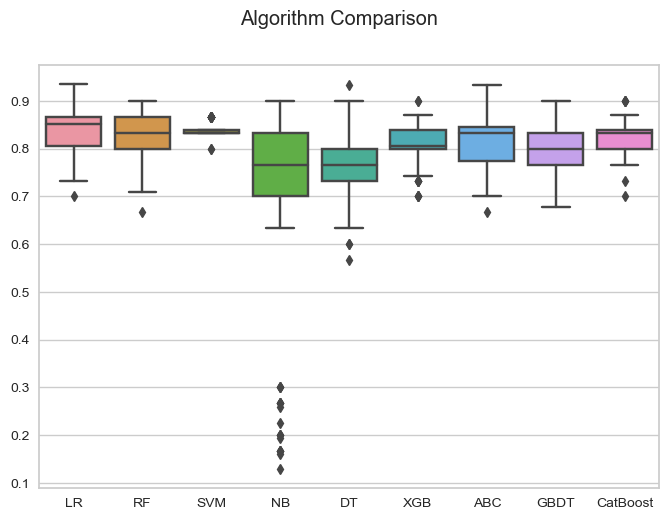

In [181]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results,)
ax.set_xticklabels(names)
plt.savefig("model comparison.png",dpi=750,bbox_inches='tight')

Learning rate set to 0.006179
0:	learn: 0.6887178	total: 158ms	remaining: 2m 38s
1:	learn: 0.6847948	total: 161ms	remaining: 1m 20s
2:	learn: 0.6810440	total: 163ms	remaining: 54.1s
3:	learn: 0.6763639	total: 165ms	remaining: 41s
4:	learn: 0.6718448	total: 166ms	remaining: 33.1s
5:	learn: 0.6673636	total: 168ms	remaining: 27.8s
6:	learn: 0.6635370	total: 170ms	remaining: 24.1s
7:	learn: 0.6587584	total: 172ms	remaining: 21.3s
8:	learn: 0.6548395	total: 173ms	remaining: 19.1s
9:	learn: 0.6505122	total: 175ms	remaining: 17.4s
10:	learn: 0.6465595	total: 177ms	remaining: 15.9s
11:	learn: 0.6419537	total: 179ms	remaining: 14.7s
12:	learn: 0.6385119	total: 181ms	remaining: 13.7s
13:	learn: 0.6347822	total: 183ms	remaining: 12.9s
14:	learn: 0.6316611	total: 184ms	remaining: 12.1s
15:	learn: 0.6277307	total: 185ms	remaining: 11.4s
16:	learn: 0.6239591	total: 187ms	remaining: 10.8s
17:	learn: 0.6201496	total: 189ms	remaining: 10.3s
18:	learn: 0.6157878	total: 191ms	remaining: 9.86s
19:	learn: 

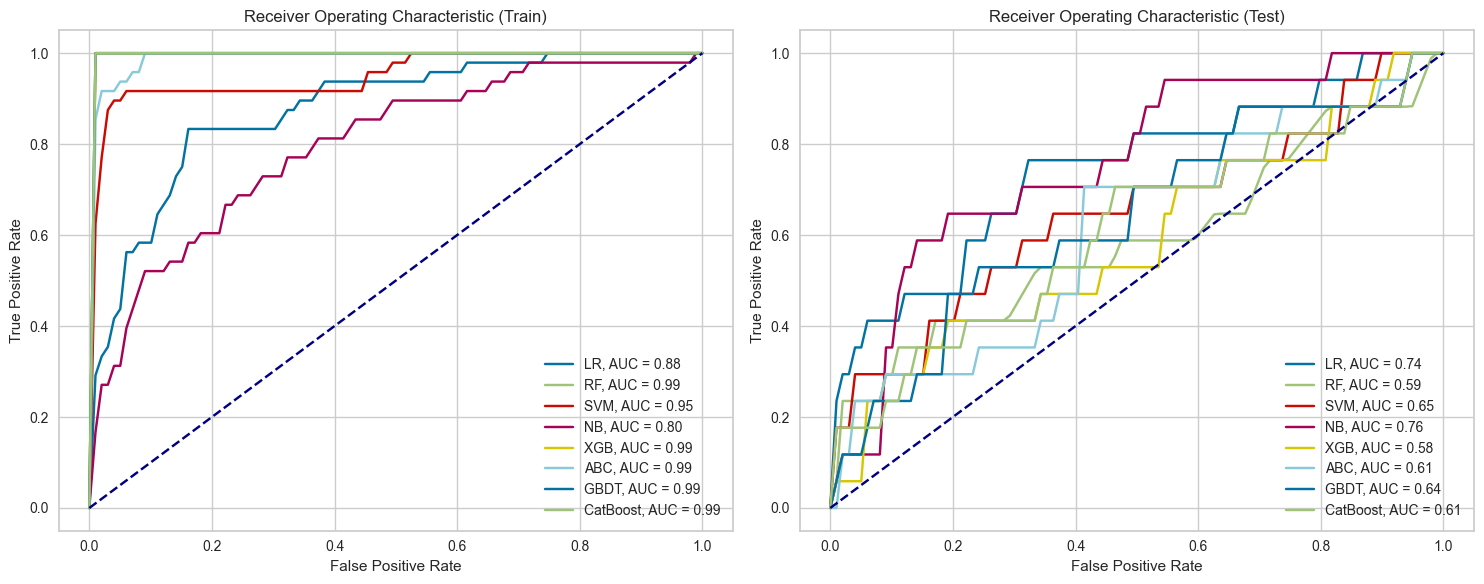

In [20]:

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
mean_fpr = np.linspace(0, 1, 100)
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('CatBoost', CatBoostClassifier()))


# evaluate each model in turn
results = []
names = []
# 计算和绘制训练集的ROC曲线
ax1.set_title('Receiver Operating Characteristic (Train)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train_std, y_train)
    
    # 预测概率
    y_train_pred_prob = pipeline.predict_proba(X_train_std)[:, 1]
    
    # 计算ROC曲线数据
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    
    # 对ROC曲线数据进行插值
    interp_tpr_train = interp(mean_fpr, fpr_train, tpr_train)
    interp_tpr_train[0] = 0.0
    
    # 计算AUC
    auc_train = auc(mean_fpr, interp_tpr_train)
    
    # 绘制平滑后的ROC曲线
    ax1.plot(mean_fpr, interp_tpr_train, label=f'{name}, AUC = {auc_train:.2f}')
    
# 添加随机猜测线
ax1.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax1.legend(loc='lower right')

# 计算和绘制测试集的ROC曲线
ax2.set_title('Receiver Operating Characteristic (Test)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train_std, y_train)
    
    # 预测概率
    y_test_pred_prob = pipeline.predict_proba(X_test_std)[:, 1]
    
    # 计算ROC曲线数据
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    
    # 对ROC曲线数据进行插值
    interp_tpr_test = interp(mean_fpr, fpr_test, tpr_test)
    interp_tpr_test[0] = 0.0
    
    # 计算AUC
    auc_test = auc(mean_fpr, interp_tpr_test)
    
    # 绘制平滑后的ROC曲线
    ax2.plot(mean_fpr, interp_tpr_test, label=f'{name}, AUC = {auc_test:.2f}')
    
# 添加随机猜测线
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.legend(loc='lower right')

# 调整子图间的间距
plt.tight_layout()

# 显示图表
plt.show()